# Beh Private Limited
   # Assignment  (NLP)

In [47]:
# importing neccessary library
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
#OneVsrestClassifier we will be taking one class at a time and classifying one class aganist another in multilabel classification 



In [48]:
#Importing the dataset
dataset = pd.read_excel("C:\\Users\\adhar\\Downloads\\traindata.xlsx")



In [13]:
# combining both text and texts coloumn into one
dataset['Text']=dataset['text']+" "+dataset['texts']
df=dataset.drop(['text','texts'],axis=1)

In [14]:
df


,Y,Text
0,DESC:manner,How did serfdom develop in and then leave Russ...
1,ENTY:cremat,What films featured the character Popeye Doyle...
2,DESC:manner,How can I find a list of celebrities ' real
3,ENTY:animal,What fowl grabs the spotlight after the Chines...
4,ABBR:exp,What is the full form of .com ?
...,...,...
15447,ENTY:other,What 's the shape of a camel 's spine ?
15448,ENTY:currency,What type of currency is used in China ?
15449,NUM:temp,What is the temperature today ?
15450,NUM:temp,What is the temperature for cooking ?


In [16]:
df.to_csv('C:\\ACCA Study materails\\sem 3\\project\\beh_newdatas.csv') # Saving the final data file 

In [26]:
type(df['Y'].iloc[0]) # string data type 
# for classification we have to make it to list and split those words for multilabel text classification

str

 # Using regular expression replacing the':' with space and splitting the words

In [28]:
# And make the varaible for multilabel data
import re
for i in range(0,len(df['Y'])):
    revi  = re.sub(':', ' ', df['Y'][i])
    revi = revi.split()
    
    df['Y'][i]=revi

In [29]:
df['Y'].iloc[0]

['DESC', 'manner']

In [49]:
df

,Y,Text
0,"[DESC, manner]",How did serfdom develop in and then leave Russ...
1,"[ENTY, cremat]",What films featured the character Popeye Doyle...
2,"[DESC, manner]",How can I find a list of celebrities ' real
3,"[ENTY, animal]",What fowl grabs the spotlight after the Chines...
4,"[ABBR, exp]",What is the full form of .com ?
...,...,...
15447,"[ENTY, other]",What 's the shape of a camel 's spine ?
15448,"[ENTY, currency]",What type of currency is used in China ?
15449,"[NUM, temp]",What is the temperature today ?
15450,"[NUM, temp]",What is the temperature for cooking ?


In [30]:
#  printing the no of unique values in the Y variable
pd.value_counts(df['Y']).nunique()

48

In [31]:
# convert 'Y' - One hot encoding for multilabel classification
multilabel=MultiLabelBinarizer() # object
y=multilabel.fit_transform(df['Y'])

In [32]:
y

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [33]:
multilabel.classes_ # The classes that got converted by onehot encoding

array(['ABBR', 'DESC', 'ENTY', 'HUM', 'LOC', 'NUM', 'abb', 'animal',
       'body', 'city', 'code', 'color', 'count', 'country', 'cremat',
       'currency', 'date', 'def', 'desc', 'dismed', 'dist', 'event',
       'exp', 'food', 'gr', 'ind', 'instru', 'lang', 'letter', 'manner',
       'money', 'mount', 'ord', 'other', 'perc', 'period', 'plant',
       'product', 'reason', 'religion', 'speed', 'sport', 'state',
       'substance', 'symbol', 'techmeth', 'temp', 'termeq', 'title',
       'veh', 'volsize', 'weight', 'word'], dtype=object)

In [34]:
Y=pd.DataFrame(y,columns=multilabel.classes_)  # converting into a dataframe
Y # Multilabel Y varaibles

,ABBR,DESC,ENTY,HUM,LOC,NUM,abb,animal,body,city,...,substance,symbol,techmeth,temp,termeq,title,veh,volsize,weight,word
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15447,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15448,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15449,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
15450,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# Importing libraries for text preprocessing

In [35]:
# libraries required for text preprocessing
#text preprocessting
import re
import nltk
from nltk.corpus import stopwords # For stop word removal
from nltk.stem import WordNetLemmatizer # for removing noise in a word such as ing/ed.. forms of words
#lemmitization will make sure that when removing the noise in the word the meaning of the root word is changed
wordlemm=WordNetLemmatizer() # creating an object

In [37]:
X = []
for i in range(0,len(df['Text'])):
    review  = re.sub('[^a-zA-Z]', ' ', df['Text'][i]) 
    review = review.lower()
    review = review.split()
   
    review = [wordlemm.lemmatize(word) for word in review]# Comprehensive list where each word is passed to lemmatize()
    review = ' '.join(review)
    X.append(review)

# Frequency distribution of questions 

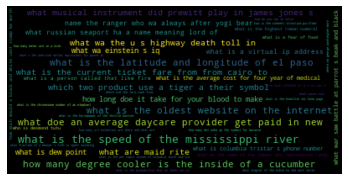

In [38]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
frequency_dist = nltk.FreqDist(X)
wcld = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wcld,interpolation='bilinear')
plt.axis('off')
plt.show()
# 

# Text Vectorization: Term Frequency — Inverse Document Frequency (TFIDF)
A technique for converting text into finite length vectors

Term frequency — Inverse document frequency (TFIDF) is based on the Bag of Words (BoW) model, which contains insights about the less relevant and more relevant words in a document. The importance of a word in the text is of great significance in information retrieval.
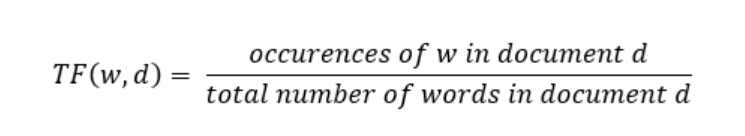
Inverse Document Frequency (IDF)
It is the measure of the importance of a word.IDF provides weightage to each word based on its frequency in the corpus D.

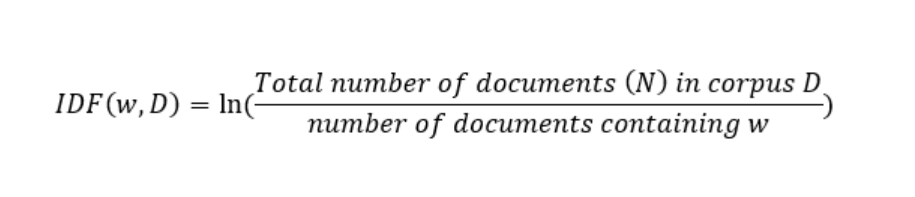

In [39]:

tfidf= TfidfVectorizer(max_features = 1500)
x = tfidf.fit_transform(X)

X = pd.DataFrame(x.toarray(),columns=tfidf.get_feature_names())

In [42]:
print(f' The shape of X is --{X.shape}, \n Y is--{ Y.shape}')

 The shape of X is --(15452, 1500), 
 Y is--(15452, 53)


# Model building

In [43]:
#splitting the data into train test
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [44]:
# Creating an object for models
sgd=SGDClassifier()
lr=LogisticRegression(solver='lbfgs')
svc=LinearSVC()


# Multi-label classification performance metric

# Jacard similarity
Multilable classification can be assessed through Jaccard similarity, or the Jaccard index. it is the size of the intersection of the predicted labels and the true labels divided by the size of the union of the predicted and true labels. It ranges from 0 to 1, and 1 is the perfect score.

In [45]:
# Jaccard similarity perfomance metric function defention
def jscore(y_true,y_pred):
    jaccard=np.minimum(y_true,y_pred).sum(axis=1)/np.maximum(y_true,y_pred).sum(axis=1)
    return jaccard.mean()*100

def print_score(y_pred,clf):
    print("clf:",clf.__class__.__name__)
    print('Jaccars Score: {}'.format(jscore(y_test,y_pred)))
    print("-------")

In [46]:
for classifier in [sgd,lr,svc]:
    clf=OneVsRestClassifier(classifier)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print_score(y_pred,classifier)

clf: SGDClassifier
Jaccars Score: 83.40342931090258
-------
clf: LogisticRegression
Jaccars Score: 68.88277795751107
-------
clf: LinearSVC
Jaccars Score: 90.29655990510082
-------


In [51]:
# Model prediction 
df['Text'][11]  # Taking the data from the dataset for prediction

'Why do heavier objects travel downhill faster ?   '

In [52]:
o=['Why do heavier objects travel downhill faster ?  ']

ss=tfidf.transform(o) # Vectorizing the data



In [53]:
clf.predict(ss) 

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [54]:
multilabel.inverse_transform(clf.predict(ss)) # transforming the prediction array in to output label

[('DESC', 'reason')]

In [55]:
# cross checking with the dataset 
df.iloc[11:12,:]

,Y,Text
11,"[DESC, reason]",Why do heavier objects travel downhill faster ...


In [56]:
# predicted correctly